In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
log_dir = r'C:\Users\pc-admin\Github Repos\spinningup\data\2019-04-28_sddpg_simple_HalfCheetah_v2_2L_test_simple_pi_loss\2019-04-28_19-38-10-sddpg_simple_HalfCheetah_v2_2L_test_simple_pi_loss_s3'

prog_log_path = "{}\progress.txt".format(log_dir)
prog_df = pd.read_csv(prog_log_path,  sep='\t')

exp_log_path = "{}\experiences_log.txt".format(log_dir)
experiences_df = pd.read_csv(exp_log_path,  sep='\t')

In [3]:
def plot_progress_log_data(prog_df, title=[''], row=1, col=5, figwidth=18, figheight=18):
    """Plot epoch log data"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    
    for d_i in range(len(title)):
        axes.flat[d_i].plot(np.arange(len(prog_df['Epoch'])), prog_df[title[d_i]])
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].set_xlabel('Epoch')
    
    # Invisualize empty axis
    if len(title) < row*col:
        for a_emp in range(len(title), row*col):
            axes.flat[a_emp].axis('off')

    plt.tight_layout()
    
def plot_experience_summary(data, title, row, col, markersize = 0.015):
    """Plot reward, uncertainty, rnd_act_error, and rnd_cri_error"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(18)
    f.set_figheight(3)
    
    for d_i in range(len(data)):
        axes.flat[d_i].plot(np.arange(data[d_i].shape[0]), data[d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    if len(data) < row*col:
        for a_emp in range(len(data), row*col):
            axes.flat[a_emp].axis('off')
    
def plot_explerience(data, row, col, markersize=0.15, figtitle='obs', figname='experience_ob.jpg', 
                     figwidth=18, figheight=18,sharey=False):
    """Plot experience log data"""
    f, axes = plt.subplots(row,col,sharey=sharey)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    for d_i in range(data.shape[1]):
        axes.flat[d_i].plot(np.arange(data.shape[0]), data[:,d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}_{}'.format(figtitle, d_i))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    for a_emp in range(data.shape[1], row*col):
        axes.flat[a_emp].axis('off')
    
    plt.tight_layout()
    plt.savefig(figname, dpi=300)


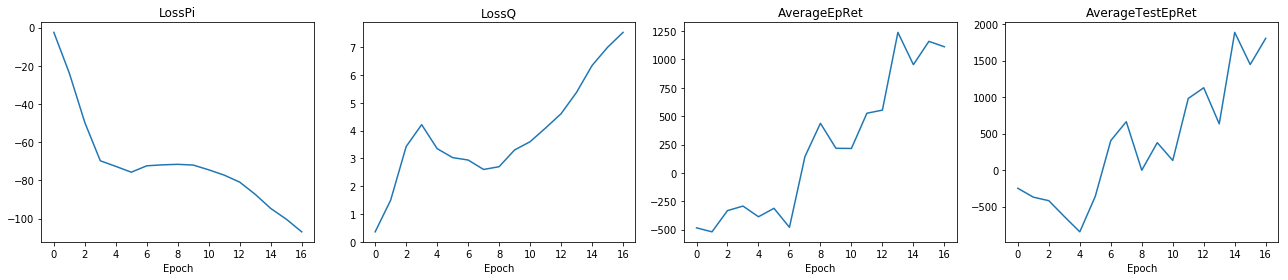

In [4]:
title=['LossPi','LossQ','AverageEpRet','AverageTestEpRet']
plot_progress_log_data(prog_df, title, row=1, col=4, figwidth=18, figheight=4)

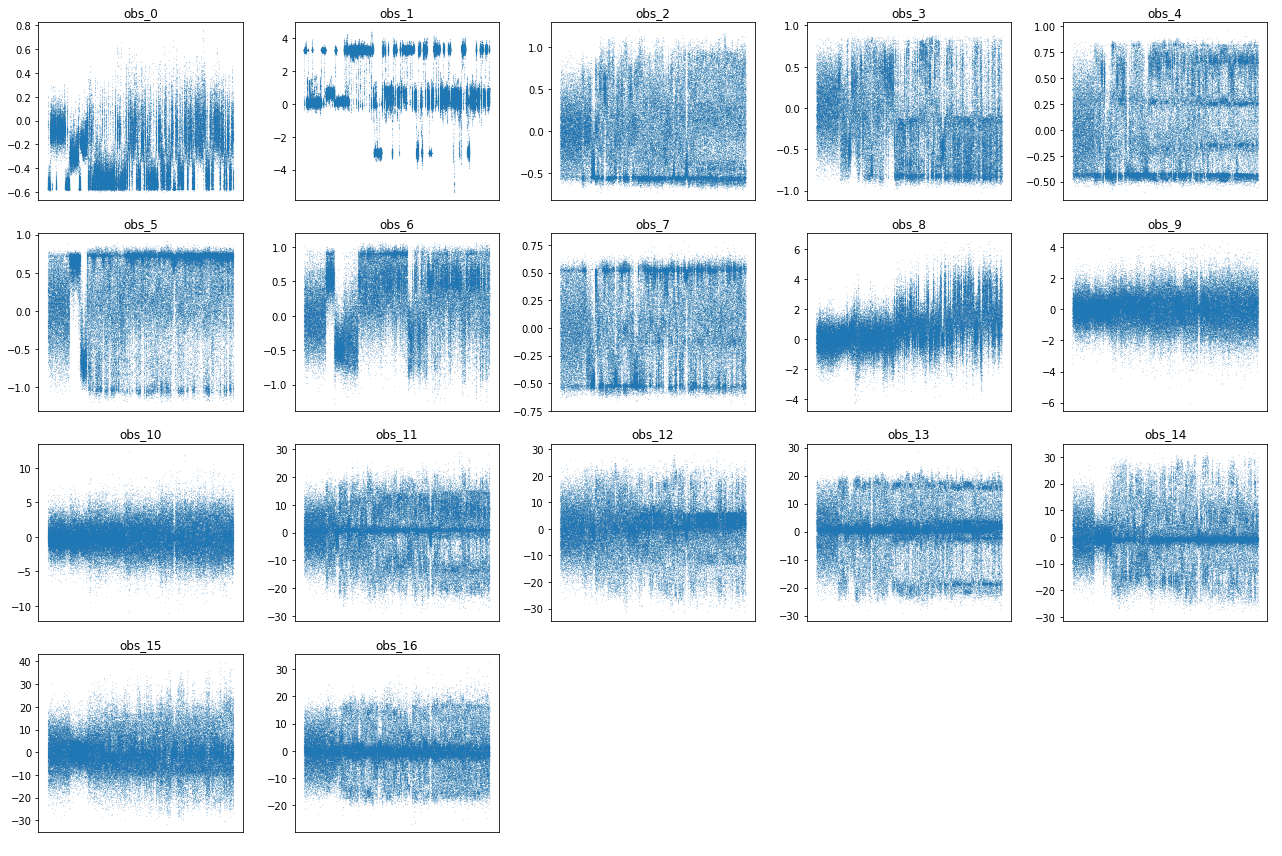

In [5]:
obs_dim = 17
exp_obs = experiences_df[['o_{}'.format(i) for i in range(obs_dim)]].values
plot_explerience(exp_obs, 4, 5, markersize=0.15, figtitle='obs', figname='experience_obs.jpg', 
                 figwidth=18, figheight=12)


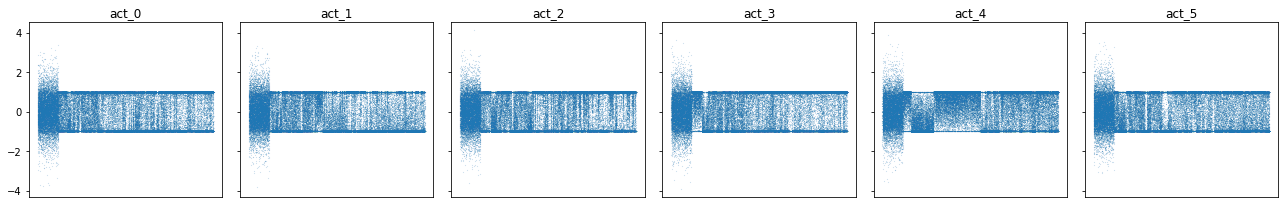

In [6]:
act_dim = 6
exp_act = experiences_df[['a_{}'.format(i) for i in range(act_dim)]].values
plot_explerience(exp_act, 1, 6, markersize=0.15, figtitle='act', figname='experience_act.jpg', 
                 figwidth=18, figheight=3, sharey=True)

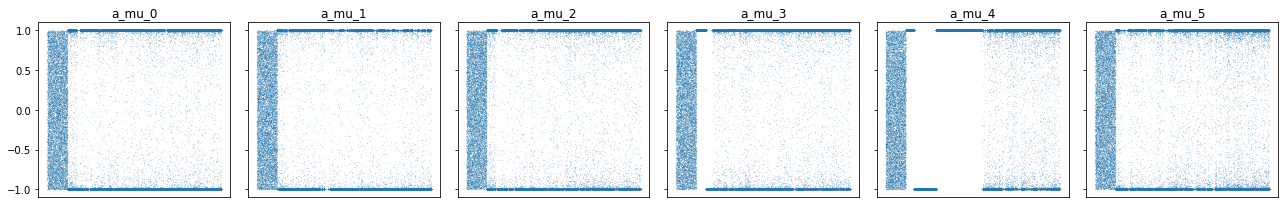

In [7]:
exp_mu = experiences_df[['a_mu_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_mu, 1, act_dim, markersize=0.15, figtitle='a_mu', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=True)

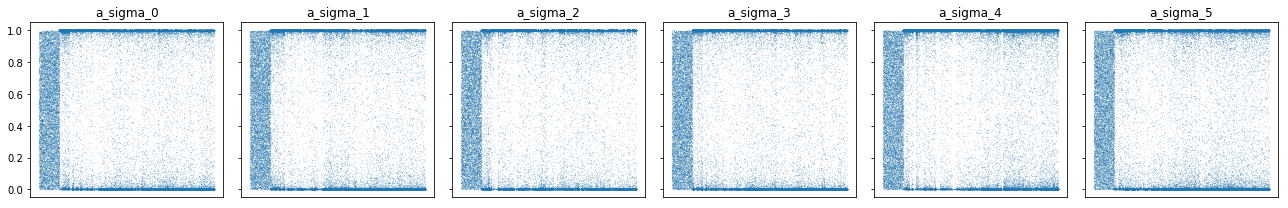

In [8]:
exp_sigma = experiences_df[['a_sigma_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_sigma, 1, act_dim, markersize=0.15, figtitle='a_sigma', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=True)